# Summing over certain Axis

Summation of a multi-dimensional array can occur over multiple axis. For example,

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.arange(20).reshape(4, 5)
print(A)
print('Over axis=0', np.sum(A, axis=0))
print('Over axis=1', np.sum(A, axis=1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
Over axis=0 [30 34 38 42 46]
Over axis=1 [10 35 60 85]


Notice the difference in output shape for the two summations.

**Problem:** Figure out how `np.sum` works over different axis. Try playing with different sized arrays. Like try summing `np.arange(3*4*5).reshape(3, 4, 5)` over different axis. Then implement your own version of the summation. Write test cases to verify it works

In [3]:
def my_sum(x, axis):
    return np.sum(x, axis=axis)

# Add test cases

# Cumulative Summation

Sometimes, it is important to get a running total of something. This can be done with [`np.cumsum`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html),

In [4]:
print(np.arange(10))
print(np.cumsum(np.arange(10)))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  3  6 10 15 21 28 36 45]


**Problem:** Figure out how cumsum works and write your own implementation with test cases.

In [5]:
def my_cumsum(x):
    return np.cumsum(x)

# Add test cases

# Discrete Integration

Scary word for cumulative summation. Let's look at an application.

**Problem:** Imagine we are looking at the output of a predictive system that forecasts Amazon sales for a particular item per day. We have a certain number of items in our various fulfillment centers called `quantity` and we would like to know when we are likely to run out of items due to sales. Use `np.sum` and `np.cumsum` to figure out when all the fulfillment centers will run out of items.

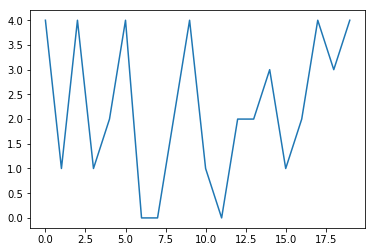

In [6]:
quantity = np.array([10, 14, 23, 8])
predicted_sales = np.random.randint(low=0, high=5, size=20)
plt.plot(predicted_sales)
plt.show()

In [7]:
# Find out when we run out of items

**Problem:** Now, imagine that we have one fulfillment center, but it has a replenishment schedule where new shipments of items come in and we need to update the quantity. Find the total quantity given the sales. The quantity is the initial quantity plus the cumulative sum of the replenishment minus the items lost due to sales.

In [8]:
initial_quantity = 10
replensishment = np.random.randint(low=0, high=5, size=20)
sales = np.random.randint(low=0, high=5, size=20)